In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.0.0'

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape(-1, 28, 28, 1)
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 28, 28, 1)
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

In [3]:
def one_hot_label(image, label):
  label = tf.one_hot(label, depth=10)
  return image, label

In [4]:
batch_size = 128
max_epochs = 2

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.batch(batch_size=batch_size)
train_dataset = train_dataset.repeat()
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)

<RepeatDataset shapes: ((None, 28, 28, 1), (None, 10)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 28, 28, 1), (None, 10)), types: (tf.float32, tf.float32)>


In [5]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [7]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.12179057 0.10630667 0.16570625 0.10055961 0.06790758 0.06193627
  0.08826493 0.10460241 0.11109947 0.07182625]]


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [9]:
# using `numpy type` data
# history = model.fit(train_dataset,
#                     batch_size=batch_size, epochs=max_epochs,
#                     validation_split=0.05)
# using `tf.data.Dataset`
history = model.fit(train_dataset, epochs=max_epochs,
                    steps_per_epoch=len(train_data) // batch_size)

Train for 468 steps
Epoch 1/2
468/468 [==============================] - 3s 6ms/step - loss: 1.1986 - accuracy: 0.6257
Epoch 2/2
468/468 [==============================] - 2s 4ms/step - loss: 0.6442 - accuracy: 0.7599


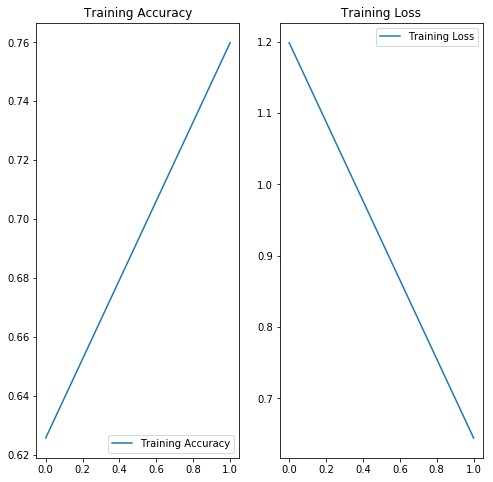

In [10]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [11]:
results = model.evaluate(test_dataset)

79/79 [==============================] - 0s 6ms/step - loss: 0.6163 - accuracy: 0.7656
